# Business 


In [130]:
import pandas as pd
import numpy as np
df = pd.read_json('/Users/siming/Desktop/Columbia Courses /Business Analytics/GroupProject/yelp_dataset/yelp_academic_dataset_business.json', lines=True)


In [131]:
#df.info()
df['state'].unique()
state = df.groupby('state')
#state.size().plot(kind='bar')

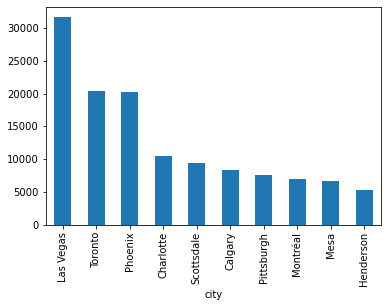

In [132]:
df['city'].unique()
state = df.groupby('city')
state.size().sort_values(ascending = False)[:10].plot(kind='bar')

In [34]:
df = df[df['city'] == 'Toronto']
#df.info()

In [35]:
df = df[df['is_open'] == 1]
#df.info()

In [36]:
df = df[['business_id', 'name', 'postal_code', 'latitude', 'longitude', 'stars', 'review_count', 'is_open', 'attributes', 'categories', 'hours']]


In [37]:
#df.info()

In [38]:
li = []
df1= df['attributes']
for item in df1:
    if item:
        li.extend(item.keys())
    else:
        pass

In [46]:
li = set(li)
#li

In [40]:
#把dictionary拍成行
for col in li:
    df[col] = np.NaN
    for i,item in enumerate(df1):
        #print(item)
        if item:
            if col in item.keys():
                df[col].iloc[i] = item[col]
            else:
                df[col].iloc[i] = np.nan
        else:
            df[col].iloc[i] = np.nan
#df.info()


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14962 entries, 9 to 209392
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 14962 non-null  object 
 1   name                        14962 non-null  object 
 2   postal_code                 14962 non-null  object 
 3   latitude                    14962 non-null  float64
 4   longitude                   14962 non-null  float64
 5   stars                       14962 non-null  float64
 6   review_count                14962 non-null  int64  
 7   is_open                     14962 non-null  int64  
 8   attributes                  12601 non-null  object 
 9   categories                  14928 non-null  object 
 10  hours                       11620 non-null  object 
 11  OutdoorSeating              4841 non-null   object 
 12  GoodForMeal                 3472 non-null   object 
 13  AgesAllowed                 8 

In [41]:
#df.columns

Index(['business_id', 'name', 'postal_code', 'latitude', 'longitude', 'stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'OutdoorSeating', 'GoodForMeal', 'AgesAllowed',
       'RestaurantsTableService', 'GoodForKids', 'RestaurantsTakeOut',
       'HappyHour', 'DietaryRestrictions', 'BusinessAcceptsBitcoin',
       'RestaurantsReservations', 'CoatCheck', 'BYOB', 'DogsAllowed',
       'ByAppointmentOnly', 'Corkage', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'Ambience', 'Music', 'BestNights', 'Alcohol',
       'WiFi', 'AcceptsInsurance', 'Smoking', 'DriveThru', 'HasTV',
       'RestaurantsCounterService', 'RestaurantsGoodForGroups', 'BikeParking',
       'GoodForDancing', 'WheelchairAccessible', 'NoiseLevel',
       'RestaurantsAttire', 'Caters', 'RestaurantsDelivery', 'BusinessParking',
       'HairSpecializesIn'],
      dtype='object')

In [42]:
#df['categories'] = df['categories'].apply(lambda x: x.split(',') if x else np.nan)

In [63]:
li2 = []
df2= df['categories']
for item in df2:
    if isinstance(item,float):
        pass
    else:
        li2.extend(item)
li2 = set(li2)


In [65]:
li2
len(li2)

1580

In [110]:
dic = dict()
for col in li2:
    dic[col] = 0
    for item in df2:
        if (1-isinstance(item,float)):
            if col in item:
                dic[col] += 1


In [114]:
dic1 = sorted(dic.items(), key = lambda d:d[1], reverse=True)
dic1 = dic1[:1500]

In [115]:
dic1 = dict(dic1)


<BarContainer object of 1500 artists>

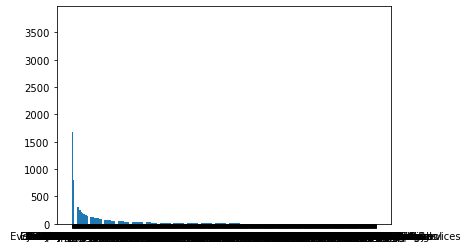

In [116]:
import matplotlib.pyplot as plt
 
plt.bar(dic1.keys(), dic1.values())


In [101]:
dic



[(' Restaurants', 3786),
 (' Food', 2354),
 (' Shopping', 1904),
 ('Restaurants', 1676),
 (' Beauty & Spas', 1171),
 (' Nightlife', 960),
 ('Food', 886),
 (' Bars', 850),
 (' Health & Medical', 796),
 (' Coffee & Tea', 770),
 ('Shopping', 752),
 (' Local Services', 661),
 (' Event Planning & Services', 619),
 (' Fashion', 550),
 (' Specialty Food', 512),
 ('Beauty & Spas', 504),
 (' Active Life', 483),
 (' Home Services', 438),
 (' Breakfast & Brunch', 409),
 (' Fast Food', 407),
 (' Cafes', 405),
 (' Sandwiches', 403),
 (' Arts & Entertainment', 401),
 (' Hair Salons', 382),
 (' Hotels & Travel', 344),
 (' Chinese', 320),
 (' Hair Removal', 317),
 (' Canadian (New)', 316),
 (' Pizza', 316),
 (' Bakeries', 316),
 (' Nail Salons', 306),
 (' Home & Garden', 305),
 (' Desserts', 302),
 ('Coffee & Tea', 285),
 (' Italian', 268),
 (' Automotive', 268),
 (' Japanese', 263),
 (' Fitness & Instruction', 258),
 ('Health & Medical', 256),
 (' Skin Care', 250),
 ('Local Services', 249),
 (" Women

In [123]:
li3 = df['hours'].iloc[0].keys()
li3



dict_keys(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

In [126]:
hour = df['hours']
for col in li3:
    df[col] = np.NaN
    for i,item in enumerate(hour):
        if item:
            if col in item.keys():
                df[col].iloc[i] = item[col]
            else:
                df[col].iloc[i] = np.nan
        else:
            df[col].iloc[i] = np.nan

In [128]:
df.to_csv('business_preprocessed.csv')

# User

In [ ]:
df = pd.read_json('/Users/siming/Desktop/Columbia Courses /Business Analytics/GroupProject/yelp_dataset/yelp_academic_dataset_user.json', lines=True)


In [ ]:
cols = ['user_id', 'review_count', 'useful', 'average_stars']
df = df[cols]

In [ ]:
df.info()
df.to_csv('user_preprocessed.csv')

# Review

In [ ]:
import pandas as pd
#cols = ['review_id','user_id','business_id','stars','date','useful']
#分chunksize读取速度更快
df = pd.read_json('/Users/siming/Desktop/Columbia Courses /Business Analytics/GroupProject/yelp_dataset/yelp_academic_dataset_review.json', lines = True, chunksize = 1000000)

In [ ]:
df1 = pd.DataFrame()
for chunk in df:
    print(1)
    chunk = chunk[['review_id','user_id','business_id','stars','date','useful']]
    df1 = pd.concat([df1,chunk],axis=0,ignore_index=True)
    print(df1.shape)

In [ ]:
business = pd.read_csv('/Users/siming/Desktop/Columbia Courses /Business Analytics/GroupProject/yelp_dataset/business_preprocessed.csv')
user = pd.read_csv('/Users/siming/Desktop/Columbia Courses /Business Analytics/GroupProject/yelp_dataset/user_preprocessed.csv')
comment = df1

# Merge

In [ ]:
middle = pd.merge(business, comment, on=['business_id', 'business_id'])

In [ ]:
final = pd.merge(middle, user, on=['user_id', 'user_id'])

In [ ]:
final.to_csv('yelp_data.csv')